# Mod 5 Project - Bank Marketing Classifier

Student details:
* Student name: **Ryan Beck** 
* Student pace: **part time** 
* Scheduled project review date/time: 
* Instructor name: **Abhineet Kulkarni**
* Blog post URL:

## Project Overview: 

# Import Libraries and Data

## Libraries

In [1]:
# Import the necessary functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

from itertools import combinations

from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

## Dataset - Bank Marketing Data Set

### Abstract: 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. **The classification goal** is to predict if the client will subscribe a term deposit (variable y).

### Citation:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt
                
Link to data: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Input variables:

_**Bank client data:**_
1. **age**: (numeric)
2. **job**: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. **marital**: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. **education**: (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. **default**: has credit in default? (categorical: 'no','yes','unknown')
6. **housing**: has housing loan? (categorical: 'no','yes','unknown')
7. **loan**: has personal loan? (categorical: 'no','yes','unknown')

_**Related with the last contact of the current campaign:**_
8. **contact**: contact communication type (categorical: 'cellular','telephone')
9. **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

_**Other attributes:**_
12. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. **previous**: number of contacts performed before this campaign and for this client (numeric)
15. **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

_**Social and economic context attributes:**_
16. **emp.var.rate**: employment variation rate - quarterly indicator (numeric)
17. **cons.price.idx**: consumer price index - monthly indicator (numeric)
18. **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)
19. **euribor3m**: euribor 3 month rate - daily indicator (numeric)
20. **nr.employed**: number of employees - quarterly indicator (numeric)

_**Output variable (desired target):**_
21. **y** - has the client subscribed a term deposit? (binary: 'yes','no')

### Variable Notes: 

* There are a lot of categorical variables in this data:
    * we will need to deal with those by creating dummy variables for them
    * this will increase the dimensionality of our models significantly, so we will need to explore methods to reduce that where possible
* There are many "unknown" and other placeholder values. We will deal with those on a variable by variable basis
* **duration** is potentially disruptive for our model for the reasons stated in the notes about the variable
    * we can go ahead and drop that variable now

### Importing data: 

Let's import our data for the first time and start get and idea of how it looks

In [2]:
# import data and specifiy the separator as ';', show the first 5 rows
df = pd.read_csv('bank-additional-full.csv', sep=';')
# show all the columns in the dataset 
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# check the shape of the data 
df.shape

(41188, 21)

In [4]:
# check the data types and number of entries for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Initial Data Notes: 
* There are over 41k data entries and 21 variables, including the target variable 'y'
* It appears that there are no missing values, but we already know there are **many placeholder values**

Let's take a look at the descriptive statistics for our continuous variables

In [5]:
# show the central tendencies for each continuous variable
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Notes:** 
* 'duration' has a lot of variance, but we already know we'll be dropping that variable
* the mean and median of 'campaign' are very close, but the max value is much greater
* the placeholder '999' has significant influence over 'pdays'
* most other variables appear fairly stable and normally distributed. We'll confirm in our exploratory data analysis

# Clean and Prepare Data

In this section we will: 
1. Check for and deal with missing values
2. Inspect and learn more about the values in each variable
3. Inspect placeholder values and determine whether we want to:
    * impute values
    * drop entries or variables
    * leave them alone

## Missing Values

Although our previous inspection of the data appeared to have no values missing it is still a good step to confirm 

In [6]:
# check for any na values in the dataset
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

Looks like we're good to go. Let's move forward with inspecting each variable more closely

## Value Counts

To better appreciate and more easily analyze our different variables we can first separate them into categorical and continuous groups

In [7]:
# create a list of continous and categortical variables based on data type
cont_vars = []
cat_vars = []

for col in df.columns: 
    if df[col].dtype == 'O':
        cat_vars.append(col)
    else: 
        cont_vars.append(col)

print(f'There are {len(cat_vars)} categorical variables: \n', cat_vars)
print('----' * 8)
print(f'There are {len(cont_vars)} continuous variables: \n', cont_vars)

There are 11 categorical variables: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
--------------------------------
There are 10 continuous variables: 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [8]:
# check the number of unique values and the percent each value represents
# for each categoritcal variable
for v in cat_vars:
    print(f'Unique values for {v}: {df[v].nunique()}\n', 
          round(df[v].value_counts(normalize=True)* 100, 2), '\n')

Unique values for job: 12
 admin.           25.30
blue-collar      22.47
technician       16.37
services          9.64
management        7.10
retired           4.18
entrepreneur      3.54
self-employed     3.45
housemaid         2.57
unemployed        2.46
student           2.12
unknown           0.80
Name: job, dtype: float64 

Unique values for marital: 4
 married     60.52
single      28.09
divorced    11.20
unknown      0.19
Name: marital, dtype: float64 

Unique values for education: 8
 university.degree      29.54
high.school            23.10
basic.9y               14.68
professional.course    12.73
basic.4y               10.14
basic.6y                5.56
unknown                 4.20
illiterate              0.04
Name: education, dtype: float64 

Unique values for default: 3
 no         79.12
unknown    20.87
yes         0.01
Name: default, dtype: float64 

Unique values for housing: 3
 yes        52.38
no         45.21
unknown     2.40
Name: housing, dtype: float64 

Unique valu

### Variable Value Notes: 
* **job:** There are 12 unique values for job with good distribution among them
    * Less than 1% of values are "unknown" -
    * With such a small number of unknowns and a relatively large number of unique values this does not seem like it will have a major influence on our model so for now we **can leave it alone** and revisit if it appears so later
* **marital:** There are three unique values for this variable with a distribution that seems representative of society
    * There are less than .2% of values shown as "unknown", but differently than before with only 3 unique variables for this data we can likely safely **impute values** by applying the known distribution to the unknown values
    * This will eliminate one unnecessary variable later on when we code dummies
* **education:** Education has 8 unique values with 4.2% unknown
    * With just under 1 in 20 values unknown we should consider **imputing values** for this variable similar to the 'marital' variable
* **default:** This is a binary yes/no variable, but also includes just over 20% "unknown"
    * This would be a large value to impute or drop.
    * With a very small value for "yes" we could likely safely code all "unknowns" as "no"
    * But, this is also interesting considering the business problem - it would be interesting to know if lack of knowledge of a default actually positively or negatively contributes to a successful marketing call
    * We will **leave "unknown" in place** for now
* **housing:** This is also a binary yes/no variable, but with a much smaller, 2.4%, amount of unknowns
    * For this variable we can likely safely **impute** again by applying the known distribution of yes/no
* **loan:** Another binary yes/no variable with the same % of unknowns
    * We can treat it similarly as the housing variable and **impute values**
    * With the same amount of unknowns it would be interesting to see if they are the same entries, and if they are missing more data should perhaps be dropped altogether
* **contact:** This variable is interestingly binary as well, between "cellular" and "telephone", we'll have to pay attention to how it is coded when we transform to dummies
* **month:** It appears this campaign was only for 10 months and heavily focused on the spring and early summer
* **day_of_week:** Calls were only made during the work week and seem very evenly distributed
    * Given the even distribution it will be very interesting to see if one day of the week was more fruitful that others
* **poutcome:** It appears that most people that had been contacted were not part of a previous campaign
    * For those that were previously contacted it will be very interesting to see if it has an influence on future success - especially those that were successfully reached previously
* **y:** Our target variable. It is good that we have no missing values here! Also it is good that we have a fairly significant positive rate with 11.27%.

**Continuous variables:** We've already previously seen the descriptive statistics of our continuous variables above and with continue to explore them in our EDA. 
* We do however know that we need to deal with the "999" placeholder for "pdays" and drop "duration"

## Dealing with "duration", "unknown", and "999" 

### Duration: 
As stated in the notes for the dataset, the "duration" variable is not a good predictor of a potential "yes" because a 0 is an automatic "no" and time spent before a call cannot be known. We will therefore first drop this from our data set 

In [9]:
# crete a new dataframe for cleaning and drop the 'duration' column
data = df.drop(columns=['duration'], axis=1)
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### "Unknown"
In the above section we decided we would: 
* Impute values for: 
    1. marital
    2. education
    3. housing
    4. loan
    
We can make a quick function to help impute values based on the weights of the currently known values

In [10]:
# write a function that takes a variable and returns a randomly selected 
# value if the variable is 'unknown'
def impute_values(variable, values, prob):
    if variable == 'unknown':
        return np.random.choice(values, p=prob)
    else: 
        return variable 

#### Marital Unknown

In [11]:
# get a unique list values and drop 'unknown'
values = list(set(df.marital.values))
values.remove('unknown')
values

['divorced', 'married', 'single']

In [12]:
# determine the weight of each value in the category 
prob = data[data['marital'] != 'unknown'].marital.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.6064026466867763, 0.2814050793032986, 0.11219227400992507]

In [13]:
# check the current distribution of values
data.marital.value_counts(normalize=True)

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

In [14]:
# impute the values for 'unknown'
data.marital = data.marital.map(lambda x: impute_values(x, values, prob))

In [15]:
# check the new distribution of values
data.marital.value_counts(normalize=True)

married     0.605686
single      0.281028
divorced    0.113285
Name: marital, dtype: float64

#### Education Unknown

In [16]:
values = list(set(data.education.values))
values.remove('unknown')
values

['professional.course',
 'basic.4y',
 'basic.9y',
 'basic.6y',
 'high.school',
 'university.degree',
 'illiterate']

In [17]:
prob = data[data['education'] != 'unknown'].education.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.3083863446283296,
 0.2411485921382771,
 0.15320475454292015,
 0.13287883011886356,
 0.10583673365942672,
 0.05808855209468535,
 0.00045619281749752894]

In [18]:
data.education.value_counts(normalize=True)

university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64

In [19]:
data.education = data.education.map(lambda x: impute_values(x, values, prob))

In [20]:
data.education.value_counts(normalize=True)

university.degree      0.298024
high.school            0.234971
basic.9y               0.153030
professional.course    0.140988
basic.4y               0.111052
basic.6y               0.061498
illiterate             0.000437
Name: education, dtype: float64

#### Housing Unknown

In [21]:
values = list(set(data.housing.values))
values.remove('unknown')
values

['no', 'yes']

In [22]:
prob = data[data['housing'] != 'unknown'].housing.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.5367431215483357, 0.46325687845166424]

In [23]:
data.housing.value_counts(normalize=True)

yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64

In [24]:
data.housing = data.housing.map(lambda x: impute_values(x, values, prob))

In [25]:
data.housing.value_counts(normalize=True)

yes    0.535399
no     0.464601
Name: housing, dtype: float64

#### Loan Unknown

In [26]:
values = list(set(data.loan.values))
values.remove('unknown')
values

['no', 'yes']

In [27]:
prob = data[data['loan'] != 'unknown'].loan.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.8445693815612717, 0.1554306184387283]

In [28]:
data.loan.value_counts(normalize=True)

no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: float64

In [29]:
data.loan = data.loan.map(lambda x: impute_values(x, values, prob))

In [30]:
data.loan.value_counts(normalize=True)

no     0.844372
yes    0.155628
Name: loan, dtype: float64

### "999"

As we know, the placeholder "999" value for 'pdays', which is the number of days since the customer was previously contacted is very prevalent. Let's take a look at how much before we decide what to do with it. 

In [31]:
data.pdays.value_counts(normalize=True)

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
19     0.000073
22     0.000073
21     0.000049
26     0.000024
20     0.000024
25     0.000024
27     0.000024
Name: pdays, dtype: float64

**Notes:** 
* The placeholder represents over 96% of values
* 0 is also a value, which may mean that a customer had previously been called on the same day

For now we can create a **new binary variable** that indicates whether or not a customer had been previously contacted. With only 4% of customers having been previously contacted this may not turn out to be a strong predictor. If it turns out that it is an important feature we can revisit. 

In [32]:
# create new column that indidates where or not a customer has been contacted
# since 999 means "not contacted" we can use that as an identifier

data['p_contacted'] = [0 if x == 999 else 1 for x in data.pdays] 
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,p_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


Let's check the value counts of our new variable to see if the distribution remains the same. We should see ~96% 0's

In [33]:
# check value counts for p_contacted
data.p_contacted.value_counts(normalize=True)

0    0.963217
1    0.036783
Name: p_contacted, dtype: float64

This looks right! Now we can drop the original 'pdays' column for now.

In [34]:
# drop the 'pdays' column
data.drop(columns=['pdays'], inplace=True)
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,p_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


This wraps up our cleaning for now. Now let's see how our data looks before we start transforming it for our models. 

# Exploratory Data Analysis and Feature Transformation

In this section we will take a deeper look at all of our variables to see if we can learn more about them before transforming them for modeling. We will look at:
1. Counts of categorical variables
2. Distributions of Continuous variables
3. Potential correlations
4. Early predictors

## Categorical Variables

In this section we will primarily look at the counts of our different categorical variables to get a feel for how they are distributed. First, we'll separate them out into their own dataframe to work with.

In [35]:
# create a dataframe with only the categroical variables we observed earlier
cat_data = data[cat_vars]
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


This looks good, except we've create a new categorical variable since we last looked at all our categorical variables, 'p_contacted'. We can add that to this dataframe now. 

Also, we should not that our target variable is in this group. That's ok for now, we want to have an idea of how that looks too. 

In [36]:
# add the 'p_contacted' variable to cat_data
cat_data = cat_data.join(data.p_contacted)
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,p_contacted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,0


In [37]:
def plot_cat_counts(df):
    
    fig = plt.figure(figsize=(15,30))
    plt.subplots_adjust(hspace=1.3)

    nrows = len(df.columns) //2 +1 
    ncols = 2
    
    for i,t in enumerate(list(df.columns)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        sns.countplot(x= df[t], 
                      data=df,  
                      orient='v',
                      ax=ax,
                      palette = 'PuBuGn_d')
        plt.title(t + '_count')
        
        if df[t].nunique() > 3:
            plt.xticks(rotation=45)

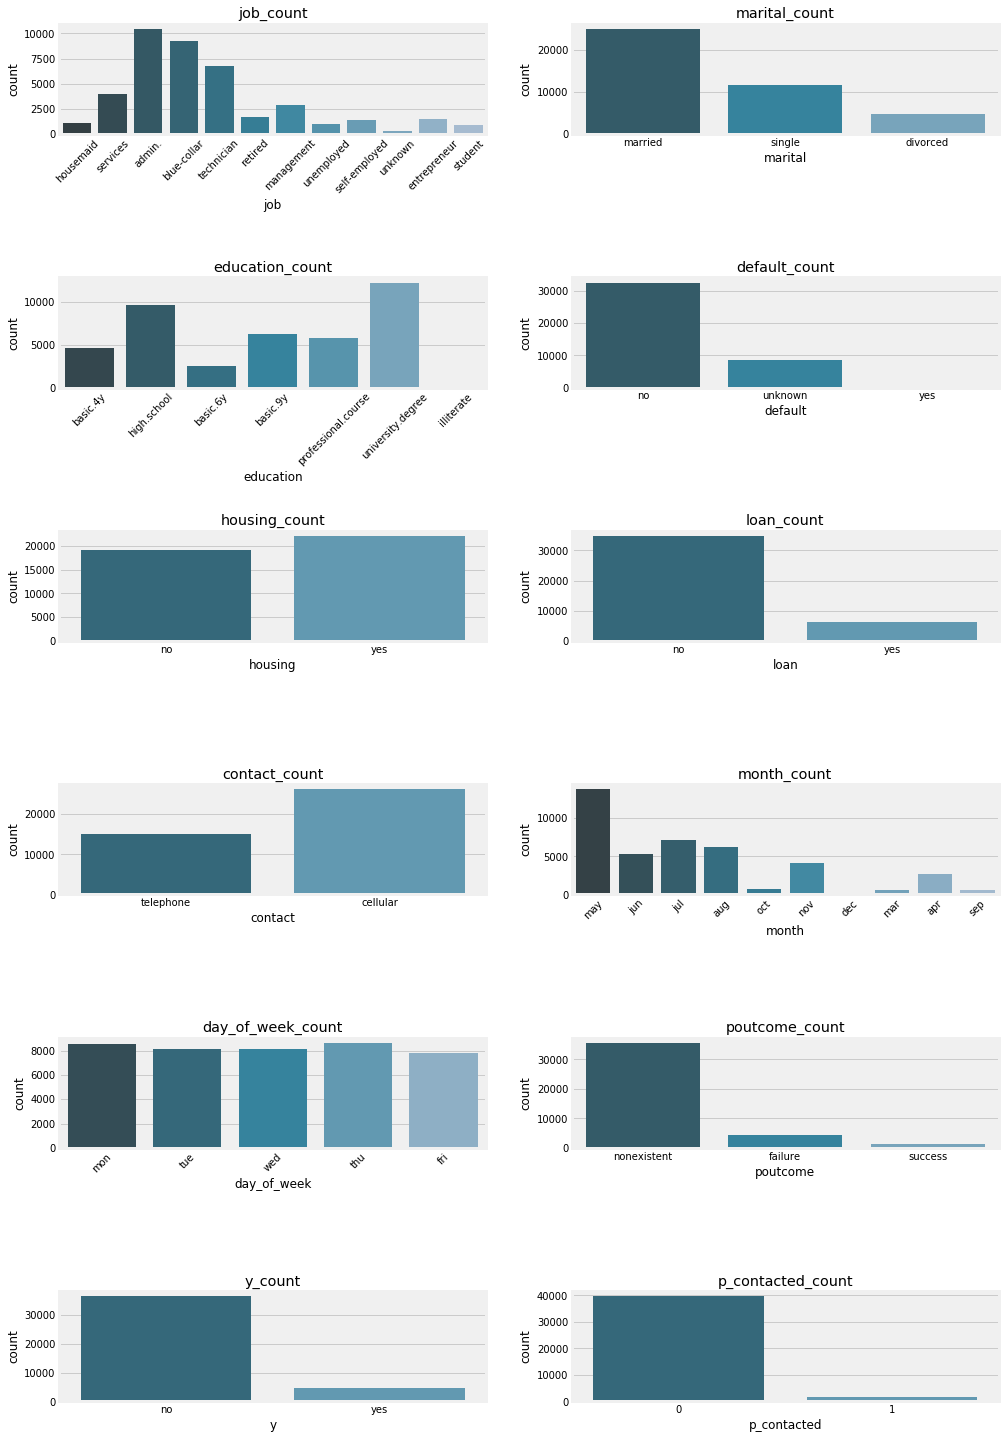

In [38]:
plot_cat_counts(cat_data)

## Continuous Variables

In [39]:
cont_vars

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [40]:
cont_vars.remove('duration')
cont_vars.remove('pdays')
cont_vars

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [41]:
cont_data = data[cont_vars]

In [42]:
def plot_cont(df):
    
    fig = plt.figure(figsize=(15,30))
    plt.subplots_adjust(hspace=.25)

    nrows = len(df.columns) //2 +1 
    ncols = 2
    
    for i,t in enumerate(list(df.columns)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        sns.distplot(a= df[t],   
                      ax=ax)
        plt.title(t + '_distribution')
        

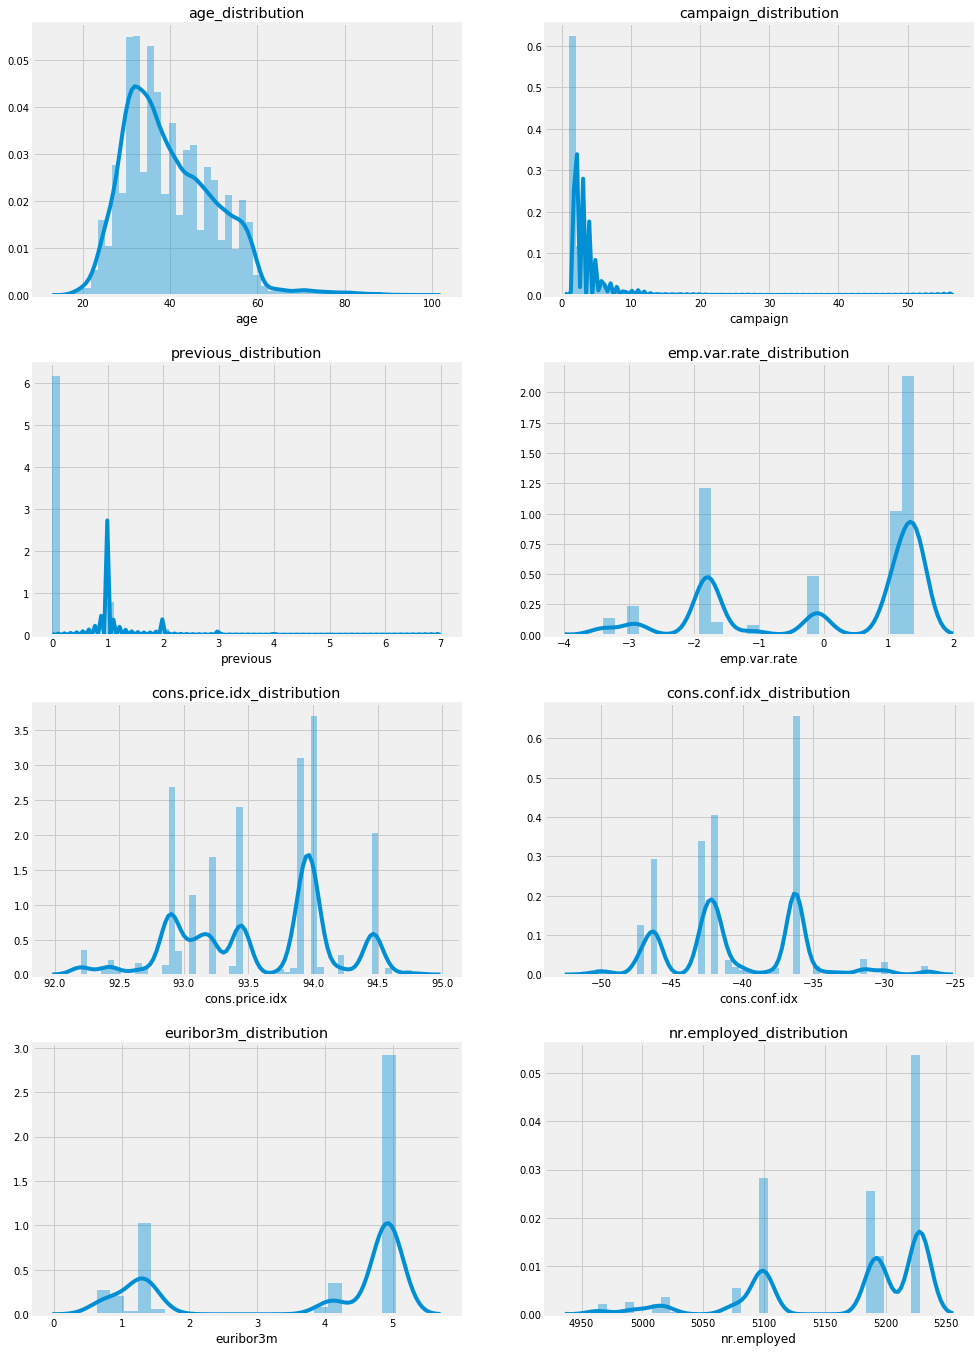

In [43]:
plot_cont(cont_data)

Check for outliers

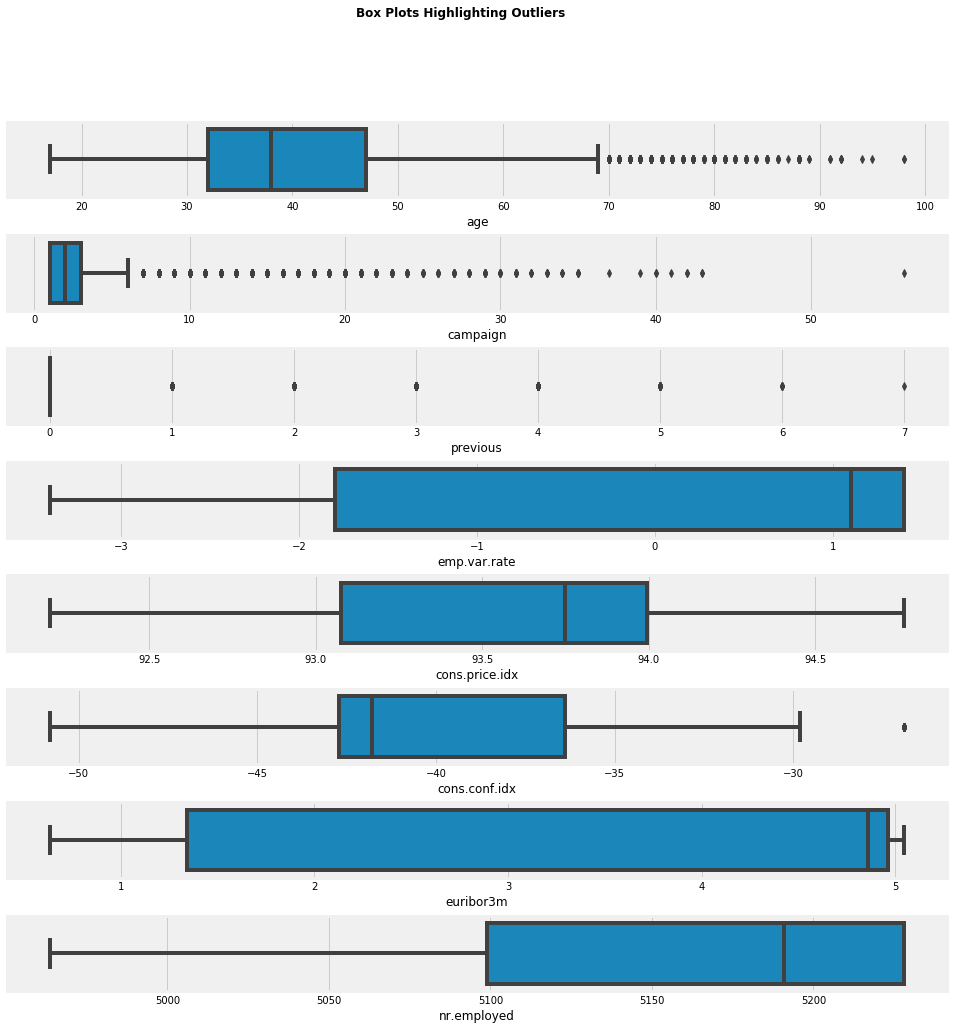

In [44]:
nrows = len(cont_vars)
fig, axes = plt.subplots(ncols=1, 
                         nrows=nrows, 
                         figsize=(15,nrows*2))
plt.subplots_adjust(hspace=0.5)

for i, var in enumerate(cont_vars):
    sns.boxplot(cont_data[var], orient='h', ax=axes[i])

fig.suptitle('Box Plots Highlighting Outliers', fontweight='bold')
plt.show()

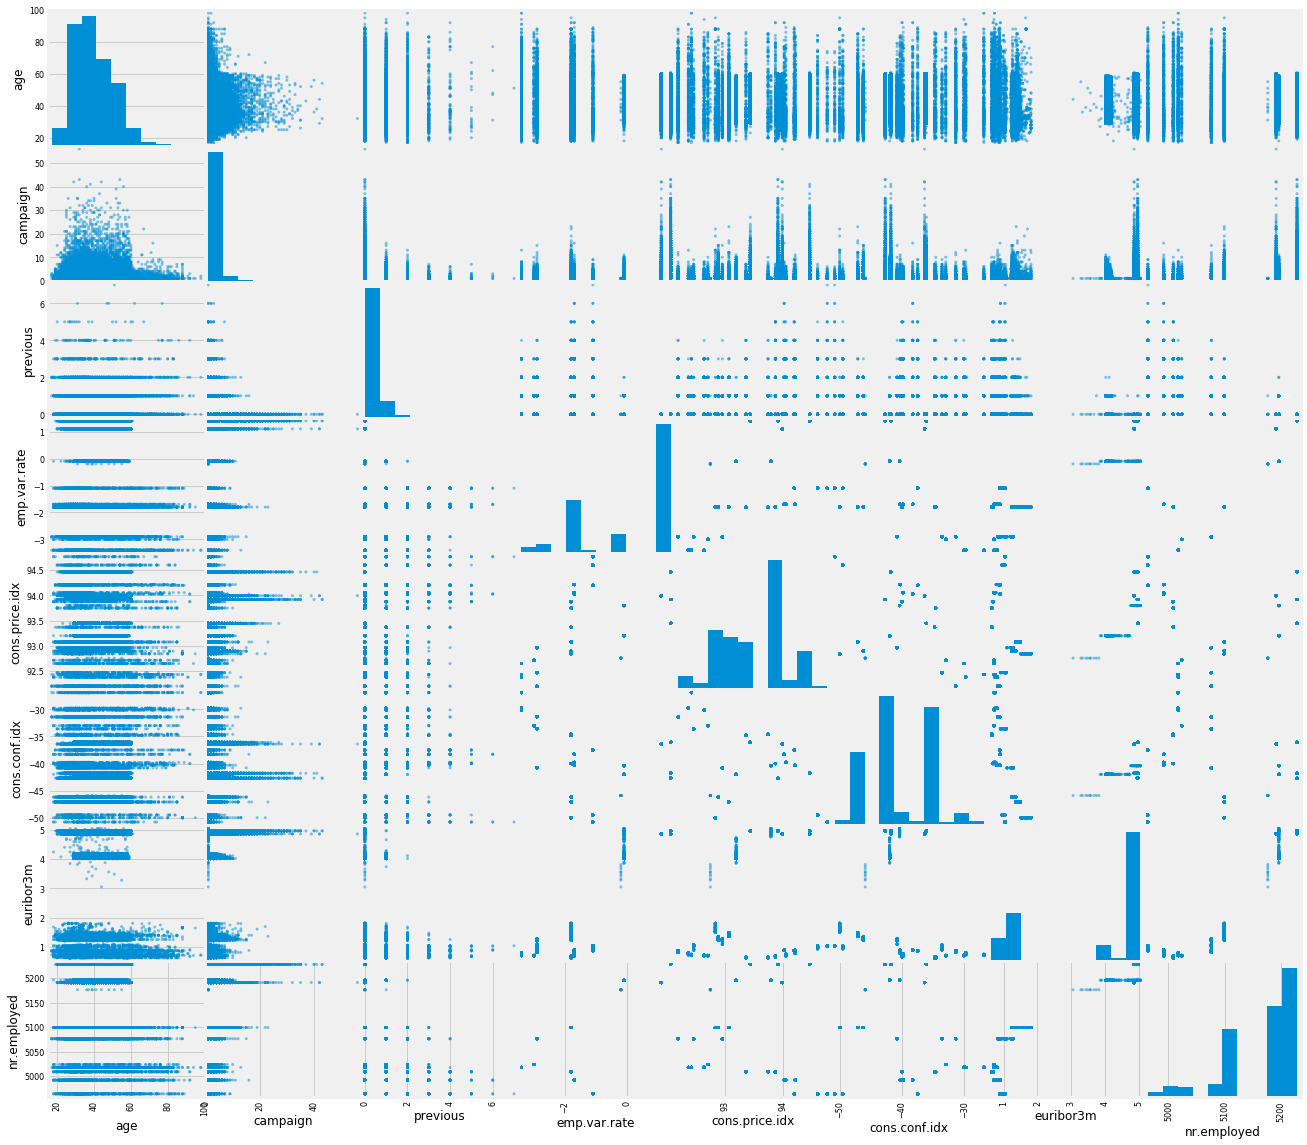

In [45]:
pd.plotting.scatter_matrix(cont_data, figsize=(20,20));

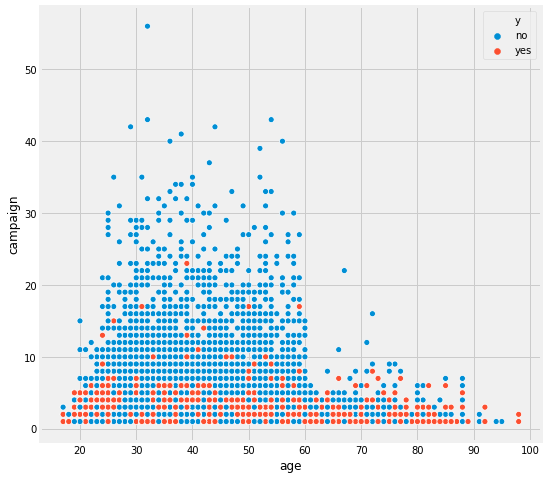

In [46]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=data.age, y=data.campaign, hue='y', data=data)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

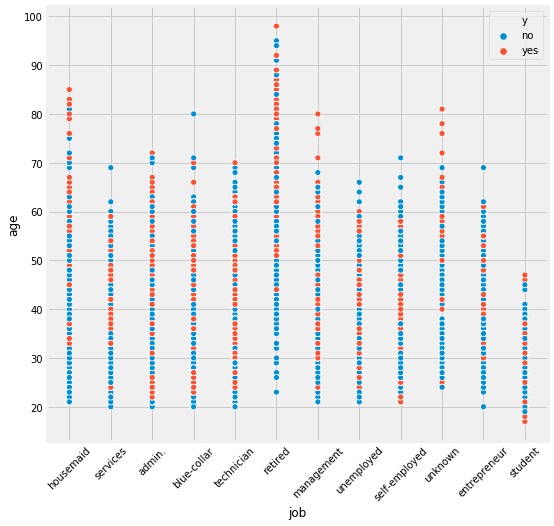

In [47]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=data.job, y=data.age, hue='y', data=data)
plt.xticks(rotation=45)

(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 11 Text xticklabel objects>)

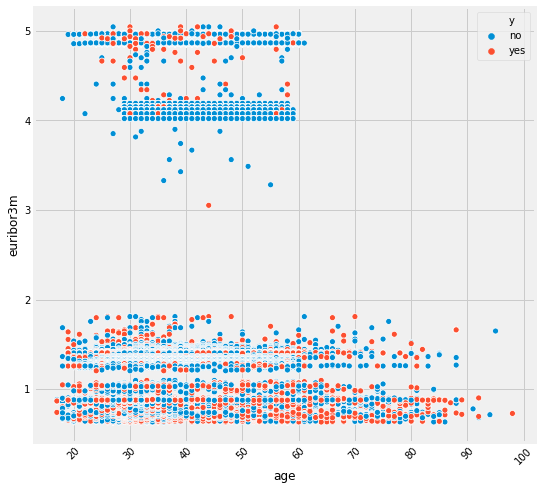

In [48]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=data.age, y=data.euribor3m, hue='y', data=data)
plt.xticks(rotation=45)

(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 11 Text xticklabel objects>)

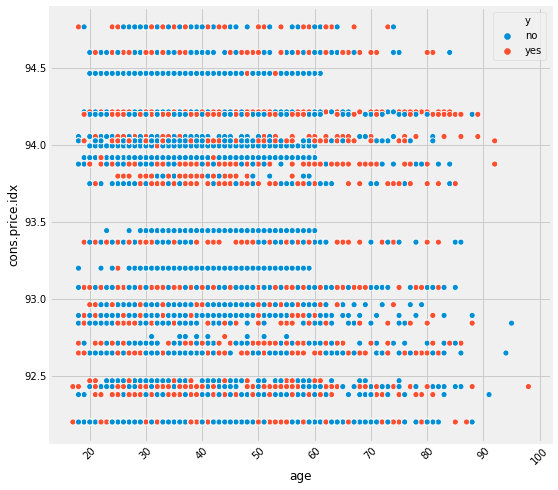

In [49]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=data.age, y=data['cons.price.idx'], hue='y', data=data)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

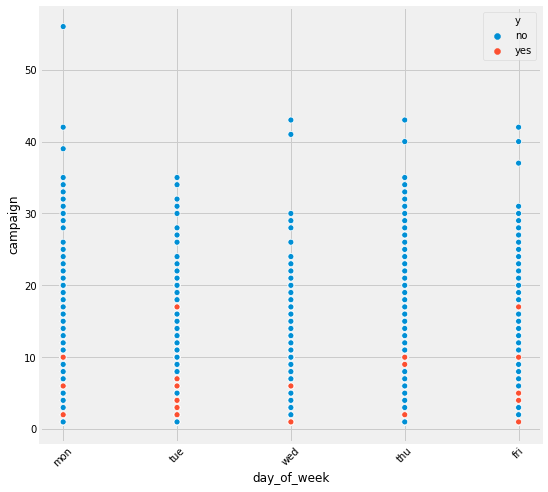

In [50]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=data.day_of_week, y=data.campaign, hue='y', data=data)
plt.xticks(rotation=45)

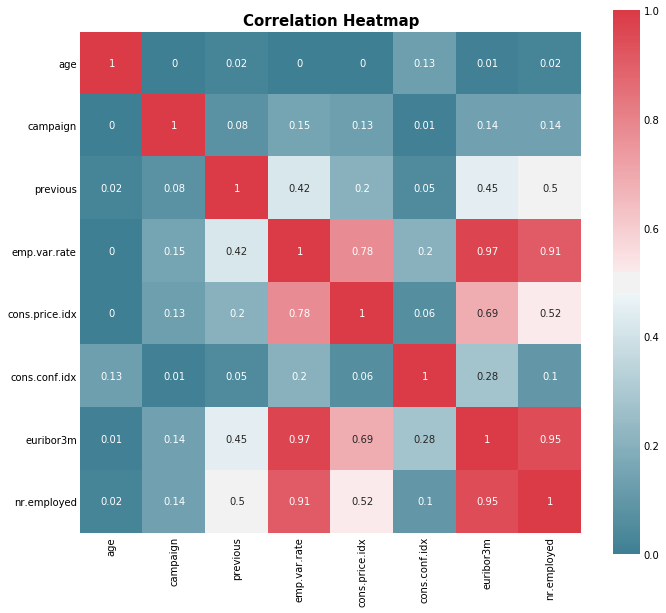

In [51]:

correlation = abs(round(cont_data.corr(), 2))
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, 
            annot= True, 
            square= True, 
            cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

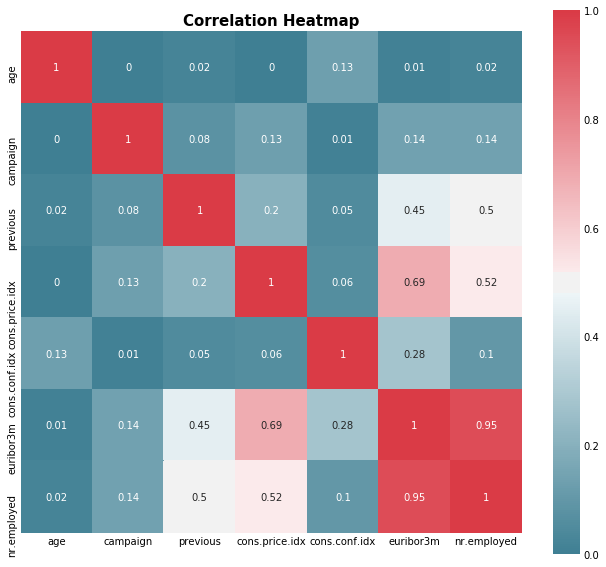

In [52]:

correlation = abs(round(cont_data.drop(columns=['emp.var.rate']).corr(), 2))
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, 
            annot= True, 
            square= True, 
            cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

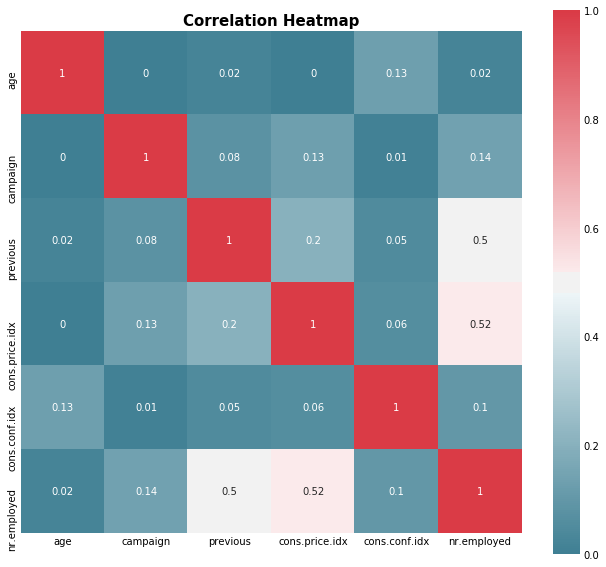

In [53]:

correlation = abs(round(cont_data.drop(columns=['euribor3m', 'emp.var.rate']).corr(), 2))
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, 
            annot= True, 
            square= True, 
            cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

In [54]:
model_data = data.drop(columns=['euribor3m', 'emp.var.rate']).copy()
model_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y,p_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,93.994,-36.4,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,93.994,-36.4,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,93.994,-36.4,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,93.994,-36.4,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,93.994,-36.4,5191.0,no,0


## Transformations

### Get Dummies

In [55]:
data_w_dummies = pd.get_dummies(model_data, drop_first=True)
data_w_dummies.head()

,age,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,p_contacted,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,0,93.994,-36.4,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,57,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,37,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,40,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,56,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [56]:
data_w_dummies.shape

(41188, 47)

In [57]:
data_w_dummies.y_yes.value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y_yes, dtype: float64

### Train-Test Split

In [58]:
target = data_w_dummies.y_yes
data_w_dummies.drop(columns=['y_yes'], inplace=True)

In [59]:
data_w_dummies.head()

,age,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,p_contacted,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,0,93.994,-36.4,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [60]:

X_train, X_test, y_train, y_test = train_test_split(data_w_dummies, 
                                                    target, 
                                                    test_size=.25,
                                                    random_state= 175)

In [61]:
original_data = {'X_train': X_train, 'y_train':y_train,
                 'X_test': X_test, 'y_test':y_test}

### Scale Data

Done after split to avoid data leakage

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

scaled_df_train = pd.DataFrame(scaled_data_train, 
                               columns=data_w_dummies.columns)
scaled_df_train.head()

,age,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,p_contacted,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.474181,-0.556333,-0.352060,-0.224286,0.951837,0.846389,-0.19414,-0.539092,-0.190428,-0.161792,-0.275552,-0.208673,-0.186932,-0.325417,-0.149123,2.265303,-0.15978,-0.089228,0.807966,-0.628094,-0.254492,-0.427755,-0.554278,-0.017995,2.470758,-0.65126,-0.512958,-0.009855,-1.070980,-0.429712,-0.75677,2.388258,-0.067956,-0.458452,-0.38579,-0.116408,-0.70582,-0.335840,-0.135135,-0.120206,-0.505649,-0.516027,2.025066,-0.496041,0.400118,-0.183473
1,-0.674294,-0.556333,-0.352060,0.593321,-0.472041,0.846389,-0.19414,-0.539092,-0.190428,-0.161792,-0.275552,-0.208673,-0.186932,-0.325417,-0.149123,2.265303,-0.15978,-0.089228,-1.237676,1.592119,-0.254492,-0.427755,1.804150,-0.017995,-0.404734,-0.65126,-0.512958,-0.009855,0.933725,-0.429712,-0.75677,-0.418715,-0.067956,2.181255,-0.38579,-0.116408,-0.70582,-0.335840,-0.135135,-0.120206,-0.505649,1.937882,-0.493811,-0.496041,0.400118,-0.183473
2,-0.387175,-0.556333,-0.352060,-0.645163,-0.321023,0.400917,-0.19414,1.854970,-0.190428,-0.161792,-0.275552,-0.208673,-0.186932,-0.325417,-0.149123,-0.441442,-0.15978,-0.089228,0.807966,-0.628094,-0.254492,-0.427755,-0.554278,-0.017995,-0.404734,-0.65126,-0.512958,-0.009855,-1.070980,2.327139,-0.75677,-0.418715,-0.067956,-0.458452,-0.38579,-0.116408,-0.70582,2.977613,-0.135135,-0.120206,-0.505649,-0.516027,-0.493811,2.015961,0.400118,-0.183473
3,0.187063,-0.556333,1.675811,-0.860777,-1.421293,-0.932741,-0.19414,1.854970,-0.190428,-0.161792,-0.275552,-0.208673,-0.186932,-0.325417,-0.149123,-0.441442,-0.15978,-0.089228,-1.237676,1.592119,-0.254492,2.337789,-0.554278,-0.017995,-0.404734,-0.65126,-0.512958,-0.009855,0.933725,-0.429712,-0.75677,-0.418715,-0.067956,-0.458452,-0.38579,-0.116408,-0.70582,-0.335840,-0.135135,-0.120206,-0.505649,-0.516027,-0.493811,-0.496041,-2.499261,-0.183473
4,-0.674294,0.851320,-0.352060,-0.224286,0.951837,0.846389,-0.19414,-0.539092,-0.190428,-0.161792,-0.275552,-0.208673,-0.186932,3.072980,-0.149123,-0.441442,-0.15978,-0.089228,0.807966,-0.628094,-0.254492,-0.427755,-0.554278,-0.017995,2.470758,-0.65126,-0.512958,-0.009855,0.933725,-0.429712,-0.75677,2.388258,-0.067956,-0.458452,-0.38579,-0.116408,-0.70582,-0.335840,-0.135135,-0.120206,-0.505649,1.937882,-0.493811,-0.496041,0.400118,-0.183473


In [64]:
scaled_data = {'X_train': scaled_data_train, 'y_train':y_train, 
               'X_test': scaled_data_test, 'y_test':y_test}

### Class Imbalance - SMOTE

In [65]:
from imblearn.over_sampling import SMOTE 

Using TensorFlow backend.


In [66]:
# Previous original class distribution
print('Original class distribution: \n')
print(target.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(scaled_data_train
                                                        , y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    36548
1     4640
Name: y_yes, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    27396
0    27396
dtype: int64


In [67]:
SMOTE_data = {'X_train': X_train_resampled, 'y_train':y_train_resampled,
              'X_test': scaled_data_test, 'y_test':y_test}

# Model Data

In [68]:
model_results = pd.DataFrame(columns=['model','data','accuracy_score',
                                      'precision','recall', 'f1_score'])
model_results

,model,data,accuracy_score,precision,recall,f1_score


In [69]:
def add_model_results(model, data, model_name, data_name, df=model_results):
    
    model.fit(data['X_train'], data['y_train'])
    preds = model.predict(data['X_test'])
    p_score = precision_score(data['y_test'], preds)
    r_score = recall_score(data['y_test'], preds)
    accuracy = accuracy_score(data['y_test'], preds)
    f_score = f1_score(data['y_test'], preds)
    
    scores = [{'model': model_name, 'data': data_name, 
               'accuracy_score': round(accuracy, 3), 
               'precision': round(p_score, 3),
               'recall':round(r_score, 3),
               'f1_score': round(f_score, 3)}]
    
    df = model_results.append(scores)
    
    return df

## Logistic Regression

In [70]:
## Specify the classifier, in this case LogisticRegression()
logreg = LogisticRegression(random_state=175, solver='lbfgs', max_iter=1000)

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=175, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
model_results = add_model_results(model=logreg,
                                  data=original_data,
                                  model_name="LogisticRegression",
                                  data_name = "original")

In [72]:
model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.6,0.224,0.327


In [73]:
print(confusion_matrix(y_test, logreg.predict(X_test)))

[[8981  171]
 [ 888  257]]


In [74]:
model_results = add_model_results(model=logreg, 
                                  data= scaled_data,
                                  model_name= "LogisticRegression",
                                  data_name= 'scaled_data')
model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350


In [75]:
print(confusion_matrix(y_test, logreg.predict(scaled_data_test)))

[[9004  148]
 [ 871  274]]


In [76]:
model_results = add_model_results(model= logreg,
                                  data= SMOTE_data, 
                                  model_name= 'LogisticRegression',
                                  data_name= "SMOTE_data")
model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427


In [77]:
print(confusion_matrix(y_test, logreg.predict(scaled_data_test)))

[[7665 1487]
 [ 430  715]]


In [78]:
## Create a parameter grid to identify optimal parameters
logreg_param_grid = {'C':[1,2,10],
                     'solver':['lbfgs', 'liblinear'],
                     'class_weight': ['balanced', None]}

In [79]:
logreg_gs = GridSearchCV(logreg, 
                         logreg_param_grid,
                         cv=3, 
                         scoring='accuracy',
                         n_jobs=-1)

In [80]:
model_results = add_model_results(model=logreg_gs,
                                  data=original_data,
                                  model_name='GridSearchCV-LogReg',
                                  data_name='original')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351


In [81]:
logreg_gs.best_params_

{'C': 2, 'class_weight': None, 'solver': 'lbfgs'}

In [82]:
print(confusion_matrix(y_test, logreg_gs.predict(X_test)))

[[8989  163]
 [ 867  278]]


In [83]:
model_results = add_model_results(model=logreg_gs, 
                                  data=SMOTE_data,
                                  model_name='GridSearch-LogReg',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427


In [84]:
logreg_gs.best_params_

{'C': 10, 'class_weight': 'balanced', 'solver': 'liblinear'}

In [85]:
print(confusion_matrix(y_test, logreg_gs.predict(scaled_data_test)))

[[7665 1487]
 [ 430  715]]


In [86]:
logreg_gs.fit(X_train_resampled, y_train_resampled)
logreg_gs.score(scaled_data_test, y_test)

0.8138292706613577

In [87]:
logreg.fit(X_train_resampled, y_train_resampled)
logreg.score(scaled_data_test, y_test)

0.8138292706613577

## K-Nearest Neighbors

In [88]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Fit the classifier
knn_clf.fit(scaled_df_train, y_train)

# Predict on the test set
test_preds = knn_clf.predict(scaled_data_test)

In [89]:
model_results = add_model_results(model=knn_clf, 
                                  data=original_data, 
                                  model_name='KNeighborsClassifier',
                                  data_name='original_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336


In [90]:
print(confusion_matrix(y_test, knn_clf.predict(X_test)))

[[8829  323]
 [ 849  296]]


In [91]:
model_results = add_model_results(model=knn_clf, 
                                  data=scaled_data, 
                                  model_name='KNeighborsClassifier',
                                  data_name='scaled_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353


In [92]:
print(confusion_matrix(y_test, knn_clf.predict(scaled_data_test)))

[[8870  282]
 [ 839  306]]


In [93]:
model_results = add_model_results(model=knn_clf, 
                                  data=SMOTE_data, 
                                  model_name='KNeighborsClassifier',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333


In [94]:
print(confusion_matrix(y_test, knn_clf.predict(scaled_data_test)))

[[7183 1969]
 [ 522  623]]


In [95]:
## Create a parameter grid to identify optimal parameters
knn_param_grid = {'n_neighbors':[3,5,10,15],
                     'weights':['uniform', 'distance'],
                     'p': [1, 2, 3]}

In [96]:
knn_clf_gs = GridSearchCV(knn_clf,
                          knn_param_grid,
                          scoring='accuracy', 
                          cv=3,
                          n_jobs=-1)

In [97]:
model_results = add_model_results(model=knn_clf_gs, 
                                  data=original_data, 
                                  model_name='GridSearch-KNN',
                                  data_name='original_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334


In [98]:
print(confusion_matrix(y_test, knn_clf_gs.predict(X_test)))

[[8937  215]
 [ 872  273]]


In [99]:
knn_clf_gs.best_params_

{'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}

In [100]:
model_results = add_model_results(model=knn_clf_gs, 
                                  data=SMOTE_data, 
                                  model_name='GridSearch-KNN',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [101]:
print(confusion_matrix(y_test, knn_clf_gs.predict(scaled_data_test)))

[[8111 1041]
 [ 678  467]]


In [102]:
knn_clf_gs.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

https://github.com/rab175/dsc-knn-with-scikit-learn-lab-online-ds-pt-071519/tree/solution

## Decision Tree & Random Forest

regular tree as baseline
https://github.com/rab175/dsc-tree-ensembles-random-forests-lab-online-ds-pt-071519/tree/solution

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 

In [105]:
model_results = add_model_results(model=tree_clf, 
                                  data=original_data, 
                                  model_name='DecisionTreeClassifier',
                                  data_name='original_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


feature importance

In [106]:
print(confusion_matrix(y_test, tree_clf.predict(X_test)))

[[8948  204]
 [ 841  304]]


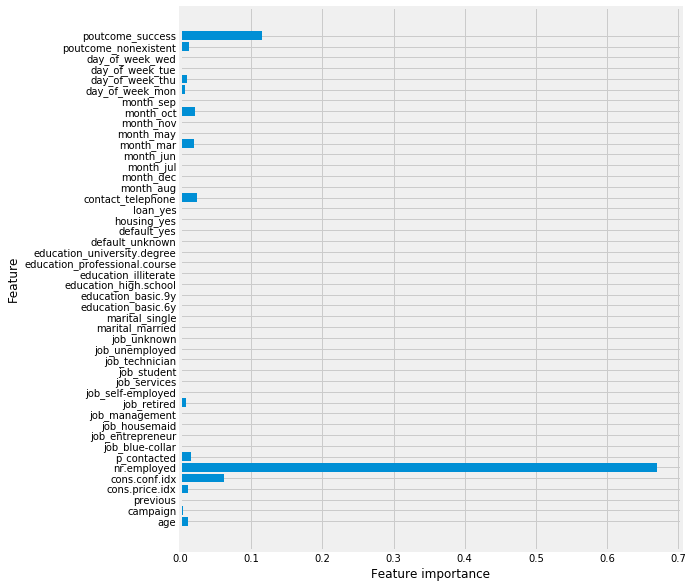

In [107]:
def plot_feature_importances(model):
    n_features = scaled_data_train.shape[1]
    plt.figure(figsize=(8,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), scaled_df_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [108]:
model_results = add_model_results(model=tree_clf, 
                                  data=scaled_data, 
                                  model_name='DecisionTreeClassifier',
                                  data_name='scaled_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [109]:
print(confusion_matrix(y_test, tree_clf.predict(scaled_data_test)))

[[8948  204]
 [ 841  304]]


In [110]:
model_results = add_model_results(model=tree_clf, 
                                  data=SMOTE_data, 
                                  model_name='DecisionTreeClassifier',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [111]:
print(confusion_matrix(y_test, tree_clf.predict(scaled_data_test)))

[[8338  814]
 [ 550  595]]


In [112]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data

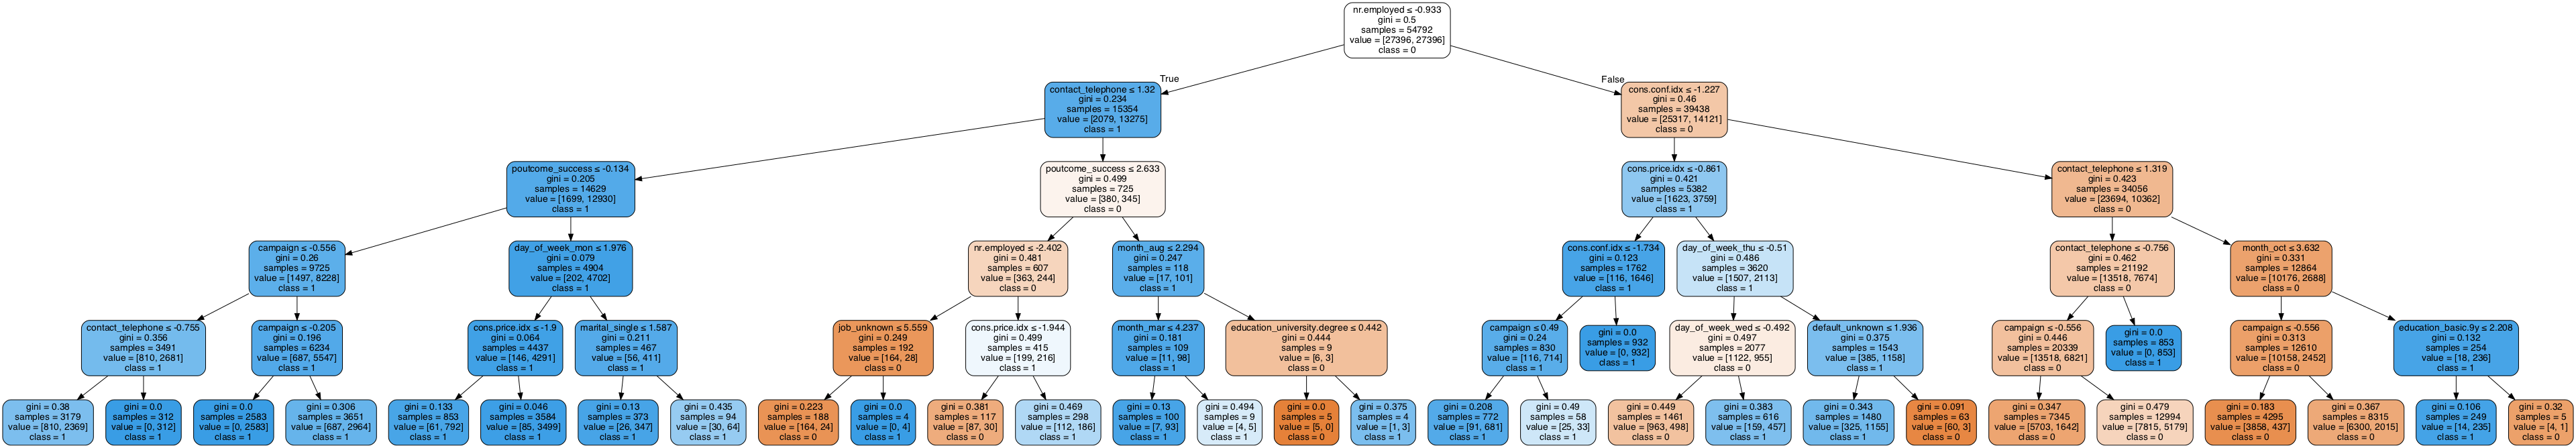

In [113]:
# Create DOT data
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=scaled_df_train.columns,  
                           class_names=np.unique(target).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

graph.set_size('"40,20!"')

# Show graph
Image(graph.create_png())

In [114]:
## Create a parameter grid to identify optimal parameters
tree_param_grid = {'criterion':['gini', 'entropy'],
                   'max_depth':[3,4,5,None],
                   'min_samples_split': [2,5, 10, 15]}

In [115]:
tree_clf_gs = GridSearchCV(tree_clf,
                          tree_param_grid,
                          scoring='accuracy', 
                          cv=3,
                          n_jobs=-1)

In [116]:
model_results = add_model_results(model=tree_clf_gs, 
                                  data=original_data, 
                                  model_name='GridSearch-Tree',
                                  data_name='original_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [117]:
print(confusion_matrix(y_test, tree_clf_gs.predict(X_test)))

[[8965  187]
 [ 855  290]]


In [118]:
tree_clf_gs.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}

In [119]:
model_results = add_model_results(model=tree_clf_gs, 
                                  data=SMOTE_data, 
                                  model_name='GridSearch-Tree',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [120]:
print(confusion_matrix(y_test, tree_clf_gs.predict(scaled_data_test)))

[[8452  700]
 [ 786  359]]


In [121]:
tree_clf_gs.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}

### Random Forest

https://github.com/rab175/dsc-tree-ensembles-random-forests-lab-online-ds-pt-071519/tree/solution

In [122]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)

In [123]:
model_results = add_model_results(model=forest, 
                                  data=original_data, 
                                  model_name='RandomForestClassifier',
                                  data_name='original_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [124]:
print(confusion_matrix(y_test, forest.predict(X_test)))

[[9055   97]
 [ 934  211]]


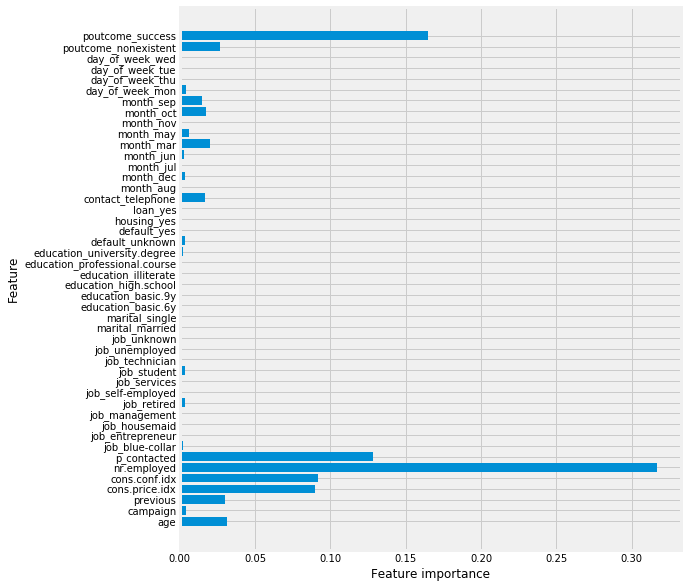

In [125]:
plot_feature_importances(forest)

In [126]:
model_results = add_model_results(model=tree_clf_gs, 
                                  data=scaled_data, 
                                  model_name='RandomForestClassifier',
                                  data_name='scaled_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [127]:
print(confusion_matrix(y_test, forest.predict(scaled_data_test)))

[[9013  139]
 [ 913  232]]


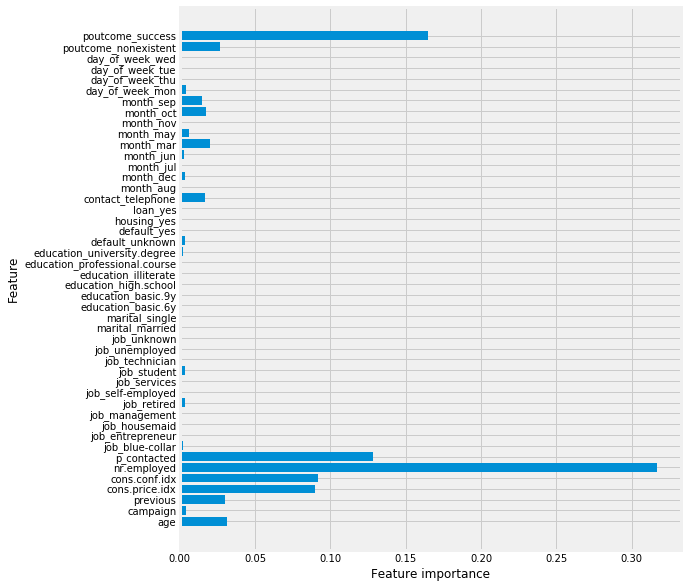

In [128]:
plot_feature_importances(forest)

In [129]:
model_results = add_model_results(model=forest, 
                                  data=SMOTE_data, 
                                  model_name='RandomForestClassifier',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [130]:
print(confusion_matrix(y_test, forest.predict(scaled_data_test)))

[[8024 1128]
 [ 486  659]]


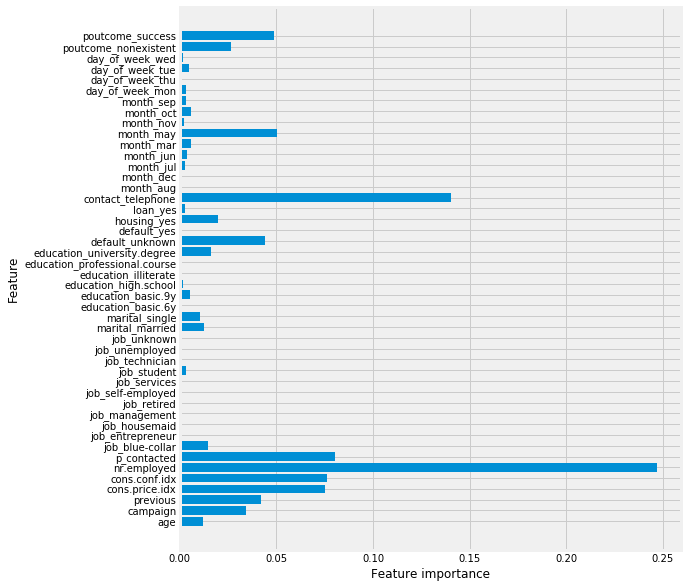

In [131]:
plot_feature_importances(forest)

Grid search and cross validation

https://github.com/rab175/dsc-gridsearchcv-lab-online-ds-pt-071519/tree/solution

In [132]:
forest_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]}

In [133]:
n = 1
for k in forest_param_grid:
    n *= len(forest_param_grid[k]) 
n

96

Grid Search will have to search through 96 different permutations.

In [134]:
# Instantiate GridSearchCV
forest_gs = GridSearchCV(forest, 
                         forest_param_grid,
                         cv=3, 
                         return_train_score=True,
                         n_jobs=-1)

In [135]:
model_results = add_model_results(model=forest_gs, 
                                  data=original_data, 
                                  model_name='GridSearch-Forest',
                                  data_name='original_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [136]:
print(confusion_matrix(y_test, forest_gs.predict(X_test)))

[[8982  170]
 [ 865  280]]


In [137]:
forest_gs.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 30}

In [139]:
model_results = add_model_results(model=forest_gs, 
                                  data=scaled_data, 
                                  model_name='GridSearch-Forest',
                                  data_name='scaled_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [140]:
print(confusion_matrix(y_test, forest_gs.predict(scaled_data_test)))

[[8984  168]
 [ 873  272]]


In [141]:
forest_gs.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 100}

In [142]:
model_results = add_model_results(model=forest_gs, 
                                  data=SMOTE_data, 
                                  model_name='GridSearch-Forest',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [143]:
print(confusion_matrix(y_test, forest_gs.predict(scaled_data_test)))

[[8650  502]
 [ 684  461]]


In [144]:
forest_gs.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

## XGBoost

https://github.com/rab175/dsc-xgboost-lab-online-ds-pt-071519/tree/solution

In [145]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [146]:
# Instantiate XGBClassifier
xgb_clf = XGBClassifier()

In [147]:
model_results = add_model_results(model=xgb_clf, 
                                  data=original_data, 
                                  model_name='XGBClassifier',
                                  data_name='original_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [148]:
print(confusion_matrix(y_test, xgb_clf.predict(X_test)))

[[8987  165]
 [ 874  271]]


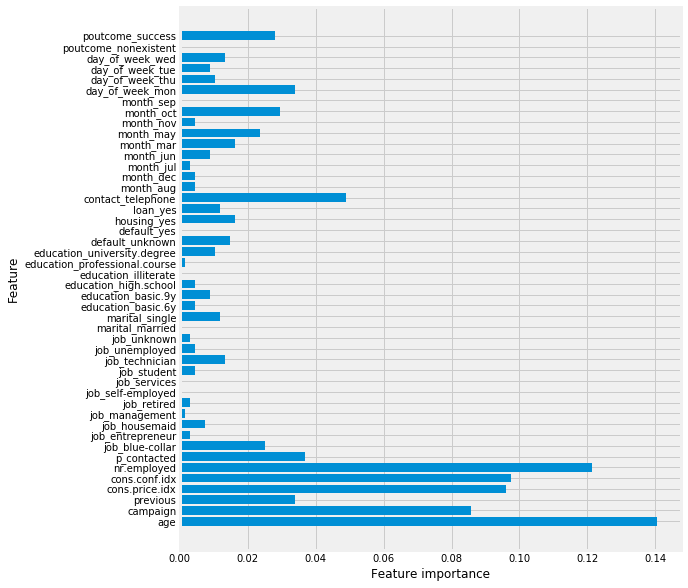

In [149]:
plot_feature_importances(xgb_clf)

In [151]:
model_results = add_model_results(model=xgb_clf, 
                                  data=scaled_data, 
                                  model_name='XGBClassifier',
                                  data_name='scaled_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [152]:
print(confusion_matrix(y_test, xgb_clf.predict(scaled_data_test)))

[[8987  165]
 [ 874  271]]


In [153]:
model_results = add_model_results(model=xgb_clf, 
                                  data=SMOTE_data, 
                                  model_name='XGBClassifier',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [154]:
print(confusion_matrix(y_test, xgb_clf.predict(scaled_data_test)))

[[8612  540]
 [ 655  490]]


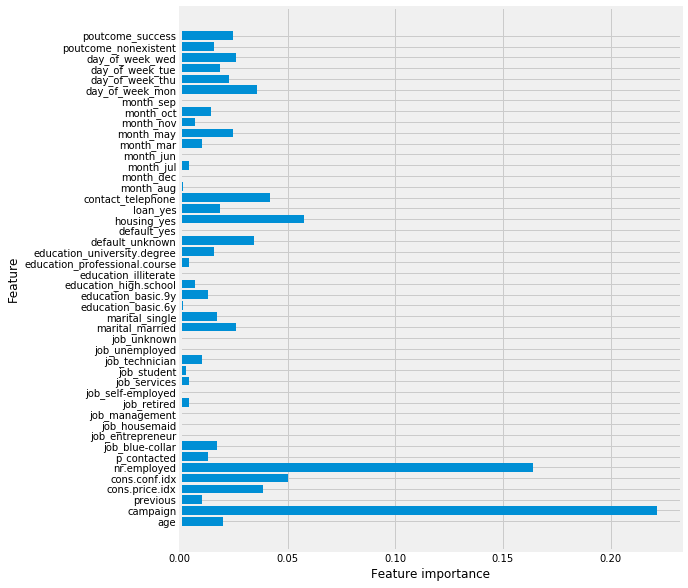

In [157]:
plot_feature_importances(xgb_clf)

In [158]:
xgb_param_grid = {
    'learning_rate': [.01, 0.1, 0.2],
    'max_depth': [3,6],
    'min_child_weight': [1, 2, 4],
    'subsample': [0.5, 0.7, 1],
    'n_estimators': [50, 100, 150]}

In [159]:
n=1 
for k in xgb_param_grid:
    n *= len(xgb_param_grid[k])
n

162

In [160]:
xgb_gs_clf = GridSearchCV(xgb_clf, 
                          xgb_param_grid,
                          scoring='accuracy',
                          cv=3,
                          n_jobs=-1)

In [161]:
model_results = add_model_results(model=xgb_gs_clf, 
                                  data=original_data, 
                                  model_name='GridSearch-XGB',
                                  data_name='original_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [162]:
print(confusion_matrix(y_test, xgb_gs_clf.predict(X_test)))

[[8984  168]
 [ 863  282]]


In [163]:
xgb_gs_clf.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_weight': 2,
 'n_estimators': 100,
 'subsample': 0.5}

In [164]:
model_results = add_model_results(model=xgb_gs_clf, 
                                  data=SMOTE_data, 
                                  model_name='GridSearch-XGB',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [165]:
print(confusion_matrix(y_test, xgb_gs_clf.predict(scaled_data_test)))

[[8890  262]
 [ 824  321]]


In [166]:
xgb_gs_clf.best_params_

{'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 2,
 'n_estimators': 150,
 'subsample': 1}

## Support Vector Machine

In [167]:
svm_clf = SVC(gamma='auto', random_state=175)

In [168]:
model_results = add_model_results(model=svm_clf, 
                                  data=original_data, 
                                  model_name='SVM',
                                  data_name='original_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [169]:
print(confusion_matrix(y_test, svm_clf.predict(X_test)))

[[8992  160]
 [ 908  237]]


In [170]:
model_results = add_model_results(model=svm_clf, 
                                  data=SMOTE_data, 
                                  model_name='SVM',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [171]:
## Specify the parameter grid to be used during the GridSearchCV
svm_param_grid = {'C':[1,5,10],
                'class_weight':['balanced', None]}

In [172]:
svm_gs_clf = GridSearchCV(svm_clf, 
                          svm_param_grid,
                          scoring='accuracy',
                          cv=3,
                          n_jobs=-1)

In [173]:
model_results = add_model_results(model=svm_gs_clf, 
                                  data=SMOTE_data, 
                                  model_name='GridSearch-SVM',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [174]:
print(confusion_matrix(y_test, svm_gs_clf.predict(scaled_data_test)))

[[8598  554]
 [ 746  399]]


In [175]:
svm_gs_clf.best_params_

{'C': 10, 'class_weight': 'balanced'}

## Principle Component Analysis

In [176]:
## Apply PCA to the original-scaled (unbalanced) dataset

## Create counter variables to identify the optimal number of components to use
## in order to explain at least 99% of the variance

components = 0
explained_variance = 0

## Use a while loop to incrementally add a component, and calculate the explained variance for
## this number of components.  Once 99% of variance is explained, stop the loop
while explained_variance < 0.99:
    components+=1
    pca = PCA(n_components=components)
    X_train_pca = pca.fit_transform(scaled_data_train)
    explained_variance = sum(pca.explained_variance_ratio_)
    

## Print the number of PCA components used, and the amount of variance explained
print("Use ",components," for PCA Dimension Reduction in the original (unbalanced) dataset")
print("This explains ", round(explained_variance*100,2), "% of the variance in the original (unbalanced) dataset" )

Use  42  for PCA Dimension Reduction in the original (unbalanced) dataset
This explains  99.32 % of the variance in the original (unbalanced) dataset


In [177]:
## Apply the transformation to the test data for the original (unbalanced) dataset 
X_test_pca = pca.transform(scaled_data_test)

In [178]:
pca_data = {'X_train': X_train_pca, 'y_train':y_train,
              'X_test': X_test_pca, 'y_test':y_test}

In [179]:
## Apply PCA to the SMOTE dataset

## Create counter variables to identify the optimal number of components to use
## in order to explain at least 99% of the variance

components = 0
explained_variance = 0

## Use a while loop to incrementally add a component, and calculate the explained variance for
## this number of components.  Once 99% of variance is explained, stop the loop
while explained_variance < 0.99:
    components+=1
    pca = PCA(n_components=components)
    X_train_SMOTE_pca = pca.fit_transform(X_train_resampled)
    explained_variance = sum(pca.explained_variance_ratio_)
    

## Print the number of PCA components used, and the amount of variance explained
print("Use ",components," for PCA Dimension Reduction in the SMOTE dataset")
print("This explains ", round(explained_variance*100,2), "% of the variance in the SMOTE dataset" )

Use  42  for PCA Dimension Reduction in the SMOTE dataset
This explains  99.24 % of the variance in the SMOTE dataset


In [180]:
## Apply the SMOTE transformation to the test data for the scaled dataset 
X_test_SMOTE_pca = pca.transform(scaled_data_test)

In [181]:
SMOTE_pca_data = {'X_train': X_train_SMOTE_pca, 'y_train':y_train_resampled,
                  'X_test': X_test_SMOTE_pca, 'y_test':y_test}

In [182]:
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [183]:
sorted_model_results = model_results.copy()

In [184]:
accuracy_model_results = sorted_model_results.sort_values(by='accuracy_score',
                                                          ascending=False)
accuracy_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,RandomForestClassifier,original_data,0.900,0.685,0.184,0.290
0,GridSearch-XGB,original_data,0.900,0.627,0.246,0.354
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-Tree,original_data,0.899,0.608,0.253,0.358


In [185]:
f1_model_results = sorted_model_results.sort_values(by='f1_score',
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,SMOTE_data,0.868,0.422,0.520,0.466
0,XGBClassifier,SMOTE_data,0.884,0.476,0.428,0.451
0,RandomForestClassifier,SMOTE_data,0.843,0.369,0.576,0.450
0,SVM,SMOTE_data,0.862,0.402,0.493,0.443
0,GridSearch-Forest,SMOTE_data,0.885,0.479,0.403,0.437


In [188]:
models = [tree_clf, forest, xgb_clf, svm_clf]
model_names = ['DecisionTreeClassifier', 'RandomForestClassifier',
               'XGBClassifier', 'SVM']

In [189]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=pca_data,
                                      model_name=model_names[i], 
                                      data_name='pca_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [197]:
for i,m in enumerate(models):
    print(model_names[i], '\n', 
          confusion_matrix(pca_data['y_test'],  
                    m.predict(pca_data['X_test'])), '\n')

DecisionTreeClassifier 
 [[9000  152]
 [ 906  239]] 

RandomForestClassifier 
 [[9058   94]
 [ 939  206]] 

XGBClassifier 
 [[8984  168]
 [ 876  269]] 

SVM 
 [[8987  165]
 [ 879  266]] 



In [198]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=SMOTE_pca_data,
                                      model_name=model_names[i], 
                                      data_name='SMOTE_pca_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.897,0.600,0.224,0.327
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,LogisticRegression,SMOTE_data,0.814,0.325,0.624,0.427
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,GridSearch-LogReg,SMOTE_data,0.814,0.325,0.624,0.427
0,KNeighborsClassifier,original_data,0.886,0.478,0.259,0.336
0,KNeighborsClassifier,scaled_data,0.891,0.520,0.267,0.353
0,KNeighborsClassifier,SMOTE_data,0.758,0.240,0.544,0.333
0,GridSearch-KNN,original_data,0.894,0.559,0.238,0.334
0,GridSearch-KNN,SMOTE_data,0.833,0.310,0.408,0.352


In [199]:
for i,m in enumerate(models):
    print(model_names[i], '\n', 
          confusion_matrix(SMOTE_pca_data['y_test'],  
                    m.predict(SMOTE_pca_data['X_test'])), '\n')

DecisionTreeClassifier 
 [[7878 1274]
 [ 477  668]] 

RandomForestClassifier 
 [[7867 1285]
 [ 452  693]] 

XGBClassifier 
 [[7904 1248]
 [ 470  675]] 

SVM 
 [[8219  933]
 [ 570  575]] 



In [200]:
sorted_model_results = model_results.copy()
f1_model_results = sorted_model_results.sort_values(by='f1_score',
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,SMOTE_data,0.868,0.422,0.520,0.466
0,XGBClassifier,SMOTE_data,0.884,0.476,0.428,0.451
0,RandomForestClassifier,SMOTE_data,0.843,0.369,0.576,0.450
0,RandomForestClassifier,SMOTE_pca_data,0.831,0.350,0.605,0.444
0,SVM,SMOTE_data,0.862,0.402,0.493,0.443


In [201]:
accuracy_model_results = sorted_model_results.sort_values(by='accuracy_score',
                                                          ascending=False)
accuracy_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,RandomForestClassifier,original_data,0.900,0.685,0.184,0.290
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,RandomForestClassifier,pca_data,0.900,0.687,0.180,0.285
0,GridSearch-XGB,original_data,0.900,0.627,0.246,0.354


## Adding Data Back In

In [202]:
full_data = pd.get_dummies(data, drop_first=True)
full_data.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,p_contacted,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [203]:
full_data.shape

(41188, 49)

In [204]:
target = full_data.y_yes
variables = full_data.drop(columns=['y_yes'])

In [205]:
X_train, X_test, y_train, y_test = train_test_split(variables, 
                                                    target, 
                                                    test_size=.25,
                                                    random_state= 175)

In [206]:
final_data = {'X_train': X_train, 'y_train':y_train,
              'X_test': X_test, 'y_test':y_test}

In [207]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=final_data,
                                      model_name=model_names[i], 
                                      data_name='final_data')
model_results.tail()

,model,data,accuracy_score,precision,recall,f1_score
0,SVM,SMOTE_pca_data,0.854,0.381,0.502,0.433
0,DecisionTreeClassifier,final_data,0.899,0.606,0.255,0.359
0,RandomForestClassifier,final_data,0.900,0.689,0.183,0.290
0,XGBClassifier,final_data,0.900,0.633,0.250,0.358
0,SVM,final_data,0.896,0.595,0.207,0.307


In [208]:
for i,m in enumerate(models):
    print(model_names[i], '\n', 
          confusion_matrix(final_data['y_test'],  
                    m.predict(final_data['X_test'])), '\n')

DecisionTreeClassifier 
 [[8962  190]
 [ 853  292]] 

RandomForestClassifier 
 [[9057   95]
 [ 935  210]] 

XGBClassifier 
 [[8986  166]
 [ 859  286]] 

SVM 
 [[8991  161]
 [ 908  237]] 



In [209]:
def plot_feature_importances(model, data=X_train):
    n_features = data.shape[1]
    plt.figure(figsize=(8,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

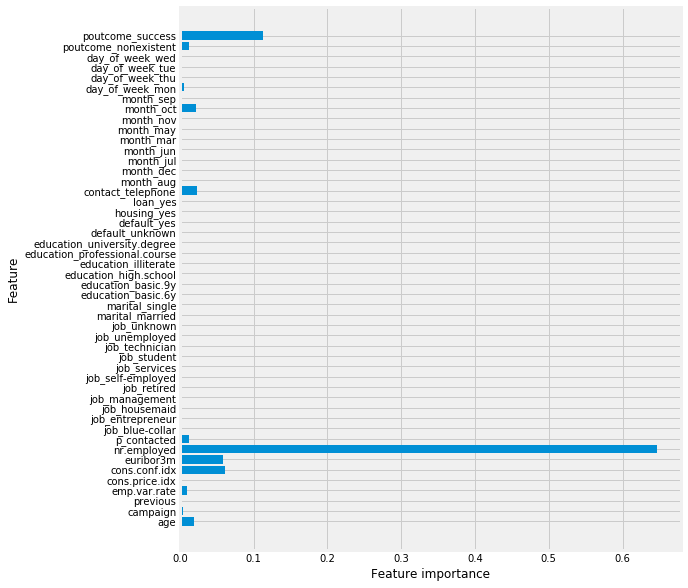

In [210]:
plot_feature_importances(tree_clf)

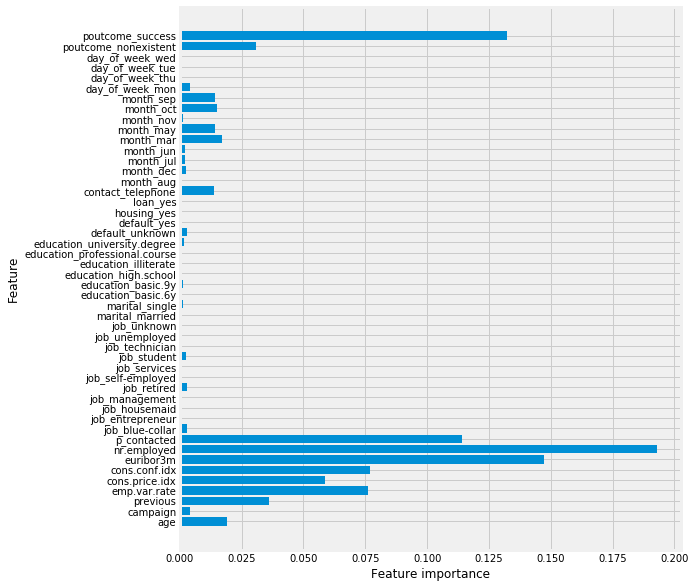

In [211]:
plot_feature_importances(forest)

In [215]:
sorted_model_results = model_results.copy()
accuracy_model_results = sorted_model_results.sort_values(by='accuracy_score',
                                                          ascending=False)
accuracy_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,XGBClassifier,final_data,0.900,0.633,0.250,0.358
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,RandomForestClassifier,final_data,0.900,0.689,0.183,0.290
0,RandomForestClassifier,pca_data,0.900,0.687,0.180,0.285


In [216]:
f1_model_results = sorted_model_results.sort_values(by='f1_score',
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,SMOTE_data,0.868,0.422,0.520,0.466
0,XGBClassifier,SMOTE_data,0.884,0.476,0.428,0.451
0,RandomForestClassifier,SMOTE_data,0.843,0.369,0.576,0.450
0,RandomForestClassifier,SMOTE_pca_data,0.831,0.350,0.605,0.444
0,SVM,SMOTE_data,0.862,0.402,0.493,0.443


In [218]:
combined_model_results = sorted_model_results.sort_values(by=['accuracy_score', 
                                                              'f1_score'],
                                                          ascending=False)
combined_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,scaled_data,0.901,0.649,0.239,0.350
0,XGBClassifier,final_data,0.900,0.633,0.250,0.358
0,GridSearch-XGB,original_data,0.900,0.627,0.246,0.354
0,GridSearchCV-LogReg,original,0.900,0.630,0.243,0.351
0,RandomForestClassifier,original_data,0.900,0.685,0.184,0.290


In [219]:
combined_model_results = sorted_model_results.sort_values(by=[f'f1_score',
                                                          'accuracy_score'],
                                                          ascending=False)
combined_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,SMOTE_data,0.868,0.422,0.520,0.466
0,XGBClassifier,SMOTE_data,0.884,0.476,0.428,0.451
0,RandomForestClassifier,SMOTE_data,0.843,0.369,0.576,0.450
0,RandomForestClassifier,SMOTE_pca_data,0.831,0.350,0.605,0.444
0,SVM,SMOTE_data,0.862,0.402,0.493,0.443


### Final Data SMOTE and Scale

In [220]:
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

In [221]:
X_train_resampled = pd.DataFrame(data=X_train_resampled, 
                                 columns=X_train.columns.values)
X_train_resampled.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,p_contacted,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,45.0,1.0,0.0,1.4,93.444,-36.1,4.966,5228.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,33.0,1.0,0.0,1.4,93.918,-42.7,4.962,5228.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,36.0,1.0,0.0,-0.1,93.200,-42.0,4.120,5195.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,42.0,1.0,1.0,-1.8,93.075,-47.1,1.405,5099.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33.0,5.0,0.0,1.4,93.444,-36.1,4.962,5228.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [223]:
scaled_data_train = scaler.fit_transform(X_train_resampled)
scaled_data_test = scaler.transform(X_test)

In [227]:
final_SMOTE_data = {'X_train': scaled_data_train, 'y_train':y_train_resampled,
                    'X_test': scaled_data_test, 'y_test':y_test}

In [228]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=final_SMOTE_data,
                                      model_name=model_names[i], 
                                      data_name='final_SMOTE_data')
model_results.tail(10)

,model,data,accuracy_score,precision,recall,f1_score
0,XGBClassifier,SMOTE_pca_data,0.833,0.351,0.590,0.440
0,SVM,SMOTE_pca_data,0.854,0.381,0.502,0.433
0,DecisionTreeClassifier,final_data,0.899,0.606,0.255,0.359
0,RandomForestClassifier,final_data,0.900,0.689,0.183,0.290
0,XGBClassifier,final_data,0.900,0.633,0.250,0.358
0,SVM,final_data,0.896,0.595,0.207,0.307
0,DecisionTreeClassifier,final_SMOTE_data,0.876,0.445,0.462,0.453
0,RandomForestClassifier,final_SMOTE_data,0.839,0.362,0.589,0.449
0,XGBClassifier,final_SMOTE_data,0.892,0.523,0.362,0.427
0,SVM,final_SMOTE_data,0.886,0.482,0.399,0.437


In [229]:
for i,m in enumerate(models):
    print(model_names[i], '\n', 
          confusion_matrix(final_SMOTE_data['y_test'],  
                    m.predict(final_SMOTE_data['X_test'])), '\n')

DecisionTreeClassifier 
 [[8491  661]
 [ 616  529]] 

RandomForestClassifier 
 [[7966 1186]
 [ 471  674]] 

XGBClassifier 
 [[8774  378]
 [ 731  414]] 

SVM 
 [[8661  491]
 [ 688  457]] 



In [230]:
sorted_model_results = model_results.copy()

f1_model_results = sorted_model_results.sort_values(by='f1_score',
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,SMOTE_data,0.868,0.422,0.520,0.466
0,DecisionTreeClassifier,final_SMOTE_data,0.876,0.445,0.462,0.453
0,XGBClassifier,SMOTE_data,0.884,0.476,0.428,0.451
0,RandomForestClassifier,SMOTE_data,0.843,0.369,0.576,0.450
0,RandomForestClassifier,final_SMOTE_data,0.839,0.362,0.589,0.449


### PCA - Again

In [231]:
## Apply PCA to the final_SMOTE dataset

## Create counter variables to identify the optimal number of components to use
## in order to explain at least 99% of the variance

components = 0
explained_variance = 0

## Use a while loop to incrementally add a component, and calculate the explained variance for
## this number of components.  Once 99% of variance is explained, stop the loop
while explained_variance < 0.99:
    components+=1
    pca = PCA(n_components=components)
    X_train_pca = pca.fit_transform(scaled_data_train)
    explained_variance = sum(pca.explained_variance_ratio_)
    

## Print the number of PCA components used, and the amount of variance explained
print("Use ",components," for PCA Dimension Reduction in the full  dataset")
print("This explains ", round(explained_variance*100,2), "% of the variance in the original full dataset" )

Use  42  for PCA Dimension Reduction in the full  dataset
This explains  99.32 % of the variance in the original full dataset


In [232]:
## Apply the transformation to the test data for the full dataset 
X_test_pca = pca.transform(scaled_data_test)

In [233]:
final_pca_data = {'X_train': X_train_pca, 'y_train':y_train_resampled,
                  'X_test': X_test_pca, 'y_test':y_test}

In [234]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=final_pca_data,
                                      model_name=model_names[i], 
                                      data_name='final_pca_data')
model_results.tail(10)

,model,data,accuracy_score,precision,recall,f1_score
0,XGBClassifier,final_data,0.900,0.633,0.250,0.358
0,SVM,final_data,0.896,0.595,0.207,0.307
0,DecisionTreeClassifier,final_SMOTE_data,0.876,0.445,0.462,0.453
0,RandomForestClassifier,final_SMOTE_data,0.839,0.362,0.589,0.449
0,XGBClassifier,final_SMOTE_data,0.892,0.523,0.362,0.427
0,SVM,final_SMOTE_data,0.886,0.482,0.399,0.437
0,DecisionTreeClassifier,final_pca_data,0.853,0.387,0.556,0.457
0,RandomForestClassifier,final_pca_data,0.822,0.335,0.611,0.433
0,XGBClassifier,final_pca_data,0.844,0.371,0.576,0.451
0,SVM,final_pca_data,0.883,0.469,0.421,0.444


In [235]:
for i,m in enumerate(models):
    print(model_names[i], '\n', 
          confusion_matrix(final_pca_data['y_test'],  
                    m.predict(final_pca_data['X_test'])), '\n')

DecisionTreeClassifier 
 [[8145 1007]
 [ 508  637]] 

RandomForestClassifier 
 [[7762 1390]
 [ 445  700]] 

XGBClassifier 
 [[8032 1120]
 [ 485  660]] 

SVM 
 [[8606  546]
 [ 663  482]] 



In [237]:
sorted_model_results = model_results.copy()

f1_model_results = sorted_model_results.sort_values(by=['f1_score', 
                                                        'accuracy_score'],
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,SMOTE_data,0.868,0.422,0.520,0.466
0,DecisionTreeClassifier,final_pca_data,0.853,0.387,0.556,0.457
0,DecisionTreeClassifier,final_SMOTE_data,0.876,0.445,0.462,0.453
0,XGBClassifier,SMOTE_data,0.884,0.476,0.428,0.451
0,XGBClassifier,final_pca_data,0.844,0.371,0.576,0.451


# Conclusions

In [246]:
full_data.columns.values

array(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'p_contacted',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success', 'y_yes'], dtype=object)

In [252]:
jobs = ['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown']
last_data = full_data.drop(columns=jobs).copy()
last_data.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,p_contacted,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [253]:
education = ['education_basic.6y', 'education_basic.9y',
             'education_high.school', 'education_illiterate',
             'education_professional.course', 'education_university.degree']

last_data = last_data.drop(columns=education).copy()
last_data.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,p_contacted,marital_married,marital_single,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [249]:
last_data.shape

(41188, 32)

In [254]:
target = last_data.y_yes
variables = last_data.drop(columns=['y_yes'])

In [256]:
X_train, X_test, y_train, y_test = train_test_split(variables, 
                                                    target, 
                                                    test_size=.25,
                                                    random_state= 175)

In [257]:
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

In [263]:
X_train_resampled = pd.DataFrame(data=X_train_resampled, 
                                 columns= variables.columns.values)

In [264]:
drop_cats_data = {'X_train': X_train_resampled, 'y_train':y_train_resampled,
                  'X_test': X_test, 'y_test':y_test}

In [265]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=drop_cats_data,
                                      model_name=model_names[i], 
                                      data_name='drop_cats_data')
model_results.tail(10)

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,final_pca_data,0.853,0.387,0.556,0.457
0,RandomForestClassifier,final_pca_data,0.822,0.335,0.611,0.433
0,XGBClassifier,final_pca_data,0.844,0.371,0.576,0.451
0,SVM,final_pca_data,0.883,0.469,0.421,0.444
0,DecisionTreeClassifier,drop_cats_data,0.871,0.427,0.474,0.450
0,RandomForestClassifier,drop_cats_data,0.845,0.373,0.584,0.455
0,DecisionTreeClassifier,drop_cats_data,0.871,0.427,0.474,0.450
0,RandomForestClassifier,drop_cats_data,0.843,0.370,0.583,0.453
0,XGBClassifier,drop_cats_data,0.892,0.517,0.377,0.436
0,SVM,drop_cats_data,0.833,0.353,0.605,0.446


In [267]:
sorted_model_results = model_results.copy()

f1_model_results = sorted_model_results.sort_values(by=['f1_score', 
                                                        'accuracy_score'],
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,SMOTE_data,0.868,0.422,0.520,0.466
0,DecisionTreeClassifier,final_pca_data,0.853,0.387,0.556,0.457
0,RandomForestClassifier,drop_cats_data,0.845,0.373,0.584,0.455
0,DecisionTreeClassifier,final_SMOTE_data,0.876,0.445,0.462,0.453
0,RandomForestClassifier,drop_cats_data,0.843,0.370,0.583,0.453


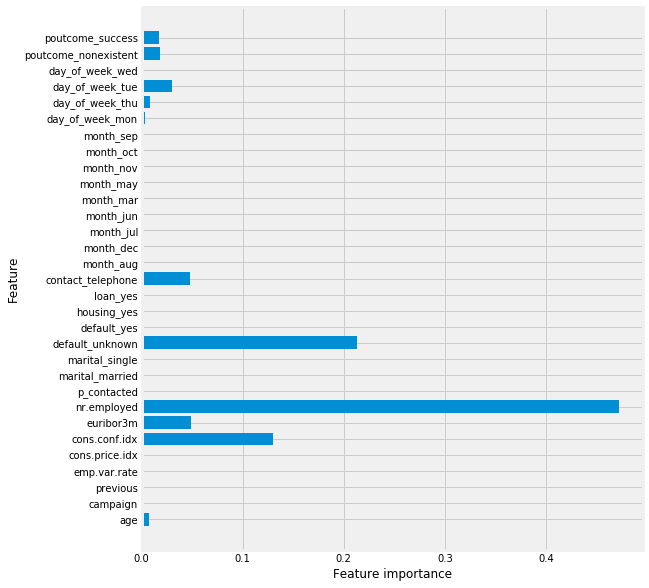

In [268]:
plot_feature_importances(tree_clf, data=X_train_resampled)

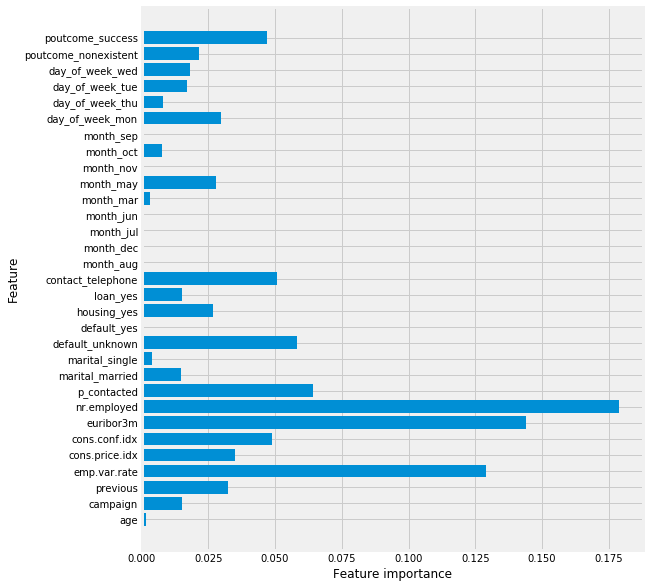

In [269]:
plot_feature_importances(forest,data=X_train_resampled)

In [271]:
months = ['month_aug', 'month_dec', 'month_jul', 'month_jun','month_nov', 
          'month_sep',]

last_data = last_data.drop(columns=months).copy()

target = last_data.y_yes
variables = last_data.drop(columns=['y_yes'])

X_train, X_test, y_train, y_test = train_test_split(variables, 
                                                    target, 
                                                    test_size=.25,
                                                    random_state= 175)

X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

X_train_resampled = pd.DataFrame(data=X_train_resampled, 
                                 columns= variables.columns.values)

drop_cats_data2 = {'X_train': X_train_resampled, 'y_train':y_train_resampled,
                  'X_test': X_test, 'y_test':y_test}

In [272]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=drop_cats_data2,
                                      model_name=model_names[i], 
                                      data_name='drop_cats_data2')
model_results.tail(10)

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,drop_cats_data,0.871,0.427,0.474,0.450
0,RandomForestClassifier,drop_cats_data,0.845,0.373,0.584,0.455
0,DecisionTreeClassifier,drop_cats_data,0.871,0.427,0.474,0.450
0,RandomForestClassifier,drop_cats_data,0.843,0.370,0.583,0.453
0,XGBClassifier,drop_cats_data,0.892,0.517,0.377,0.436
0,SVM,drop_cats_data,0.833,0.353,0.605,0.446
0,DecisionTreeClassifier,drop_cats_data2,0.871,0.427,0.471,0.448
0,RandomForestClassifier,drop_cats_data2,0.852,0.387,0.572,0.462
0,XGBClassifier,drop_cats_data2,0.891,0.515,0.365,0.427
0,SVM,drop_cats_data2,0.827,0.341,0.591,0.432


In [273]:
sorted_model_results = model_results.copy()

f1_model_results = sorted_model_results.sort_values(by=['f1_score', 
                                                        'accuracy_score'],
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,SMOTE_data,0.868,0.422,0.520,0.466
0,RandomForestClassifier,drop_cats_data2,0.852,0.387,0.572,0.462
0,DecisionTreeClassifier,final_pca_data,0.853,0.387,0.556,0.457
0,RandomForestClassifier,drop_cats_data,0.845,0.373,0.584,0.455
0,DecisionTreeClassifier,final_SMOTE_data,0.876,0.445,0.462,0.453


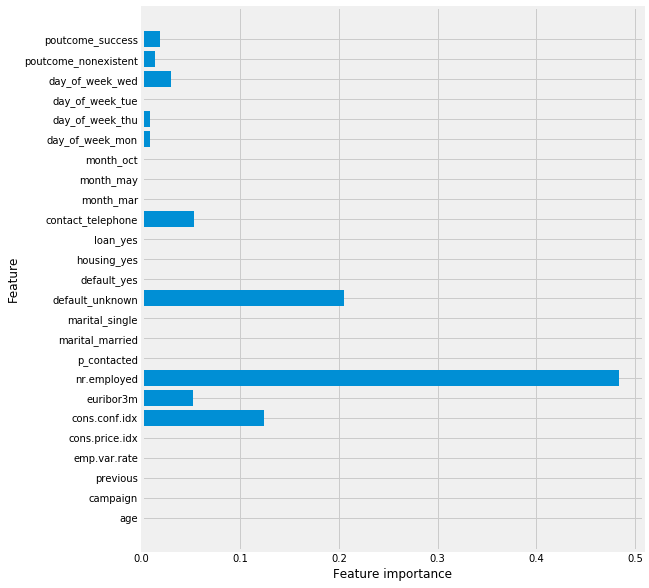

In [274]:
plot_feature_importances(tree_clf, data=X_train_resampled)

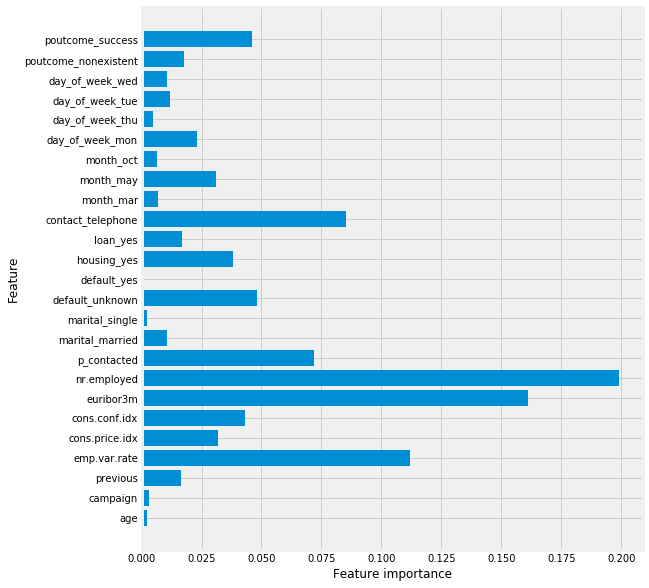

In [275]:
plot_feature_importances(forest,data=X_train_resampled)

In [277]:
scaled_data_train = scaler.fit_transform(X_train_resampled)
scaled_data_test = scaler.transform(X_test)

## Apply PCA to the final_SMOTE dataset

## Create counter variables to identify the optimal number of components to use
## in order to explain at least 99% of the variance

components = 0
explained_variance = 0

## Use a while loop to incrementally add a component, and calculate the explained variance for
## this number of components.  Once 99% of variance is explained, stop the loop
while explained_variance < 0.99:
    components+=1
    pca = PCA(n_components=components)
    X_train_pca = pca.fit_transform(scaled_data_train)
    explained_variance = sum(pca.explained_variance_ratio_)
    

## Print the number of PCA components used, and the amount of variance explained
print("Use ",components," for PCA Dimension Reduction in the full  dataset")
print("This explains ", round(explained_variance*100,2), "% of the variance in the original full dataset" )



Use  21  for PCA Dimension Reduction in the full  dataset
This explains  99.3 % of the variance in the original full dataset


In [278]:
## Apply the transformation to the test data for the full dataset 
X_test_pca = pca.transform(scaled_data_test)

In [279]:
cat_drop_pca_data = {'X_train': X_train_pca, 'y_train':y_train_resampled,
                    'X_test': X_test_pca, 'y_test':y_test}

In [280]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=cat_drop_pca_data,
                                      model_name=model_names[i], 
                                      data_name='cat_drop_pca_data')
model_results.tail(10)

,model,data,accuracy_score,precision,recall,f1_score
0,XGBClassifier,drop_cats_data,0.892,0.517,0.377,0.436
0,SVM,drop_cats_data,0.833,0.353,0.605,0.446
0,DecisionTreeClassifier,drop_cats_data2,0.871,0.427,0.471,0.448
0,RandomForestClassifier,drop_cats_data2,0.852,0.387,0.572,0.462
0,XGBClassifier,drop_cats_data2,0.891,0.515,0.365,0.427
0,SVM,drop_cats_data2,0.827,0.341,0.591,0.432
0,DecisionTreeClassifier,cat_drop_pca_data,0.838,0.357,0.574,0.440
0,RandomForestClassifier,cat_drop_pca_data,0.830,0.347,0.601,0.440
0,XGBClassifier,cat_drop_pca_data,0.849,0.379,0.555,0.451
0,SVM,cat_drop_pca_data,0.880,0.460,0.452,0.456


In [281]:
sorted_model_results = model_results.copy()

f1_model_results = sorted_model_results.sort_values(by=['f1_score', 
                                                        'accuracy_score'],
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,SMOTE_data,0.868,0.422,0.520,0.466
0,RandomForestClassifier,drop_cats_data2,0.852,0.387,0.572,0.462
0,DecisionTreeClassifier,final_pca_data,0.853,0.387,0.556,0.457
0,SVM,cat_drop_pca_data,0.880,0.460,0.452,0.456
0,RandomForestClassifier,drop_cats_data,0.845,0.373,0.584,0.455


# Graveyard

* try dropping parameters
* Try under-sampling noes 
* try SMOTE

In [ ]:
# def print_metrics(labels, preds):
#     print("Precision Score: {}".format(precision_score(labels, preds)))
#     print("Recall Score: {}".format(recall_score(labels, preds)))
#     print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
#     print("F1 Score: {}".format(f1_score(labels, preds)))

In [ ]:
# cont_vars = []
# cat_vars = []

# for col in df.columns: 
#     if df[col].dtype == 'O':
#         cat_vars.append(col)
#     else: 
#         cont_vars.append(col)

# print(f'There are {len(cat_vars)} categorical variables: \n', cat_vars)
# print('----' * 8)
# print(f'There are {len(cont_vars)} continuous variables: \n', cont_vars)

In [ ]:
# cat_vars.pop()
# cat_vars

In [ ]:
# for v in cat_vars:
#     print(v+':', '\n', df[v].value_counts(normalize=True), '\n')

In [ ]:
# camps = df.campaign.value_counts(normalize=True)
# camps_index = np.array(camps.index)

# cum_camps = []
# i = 0
# for v in camps: 
#     i += v
#     cum_camps.append(i)

# cum_camps = np.array(cum_camps) 


In [ ]:
# fig = plt.figure(figsize=(6,6))

# plt.plot(camps2, cum_camps)
# plt.show()

In [ ]:
# plt.figure(figsize=(10, 10))
# plot = sns.catplot(x='job', kind='count', data=cat_data)

# # plot.ax gives the axis object
# # plot.ax.patches gives list of bars that can be access using index starting at 0

# for i, bar in enumerate(plot.ax.patches):
#     h = bar.get_height()
#     plot.ax.text(
#         i, # bar index (x coordinate of text)
#         h+10, # y coordinate of text
#         '{}'.format(int(h)),  # y label
#         ha='center', 
#         va='center', 
#         fontweight='bold', 
#         size=14)
# plt.show()

In [ ]:
# for col in cat_data.columns:
#     plt.figure(figsize=(6, 6))
#     fig = sns.countplot(y= cat_data[col], 
#                   data= cat_data,
#                   hue='y')
#     plt.xticks(fontsize=10, rotation=45)
#     plt.legend(fontsize=12, loc='best')
#     plt.title(col)
    
#     plt.show()

In [ ]:
# g = sns.catplot(x="poutcome", y="y", col="month",
#                 col_wrap = 5,
#                 data=test_data, saturation=.5,
#                 kind="bar", ci=None, aspect=.6)

# (g.set_axis_labels("", "Rate")
#   .set_xticklabels(["nonexistant", "failure", "success"])
#   .set_titles("{col_name} {col_var}")
#   .set(ylim=(0, 1))
#   .despine(left=True)
#   .legend(lob='best'))  